In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy import stats
from sklearn.preprocessing import PowerTransformer

#load training and test data
dataset = pd.read_csv('cleanData.csv')

In [3]:
def dropCat(data):
    return data.drop(['Area Code','Area Name','parent_name','parent_area'],axis=1)

In [27]:
#view the correlation of each feature to cancer death rates in descending order
correlation_checker = pd.DataFrame(dataset.corr()['cancer_death_rate'])
correlation_checker.iloc[(-correlation_checker.cancer_death_rate.abs()).argsort()]

,cancer_death_rate
cancer_death_rate,1.000000
cardiovascular,0.728577
respiratory,0.695564
mental,0.667774
education,-0.626421
Five_a_day,-0.578521
back_pain,0.570957
alcohol,0.566451
diabetes,0.494539
inactive,0.478987


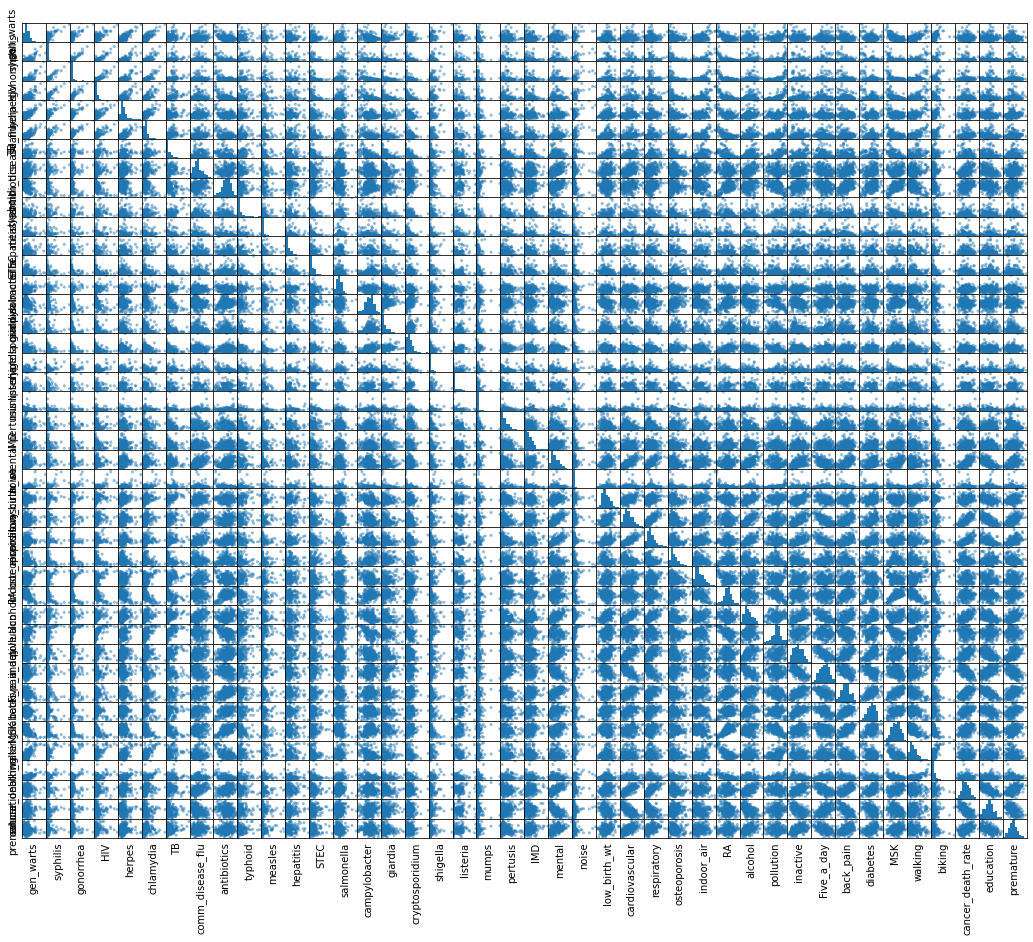

In [10]:
#Checking the correlation between the features shows there's high correlation between a number of them,
#so feature-reduction should be explored in the modeling stage
#scatter_matrix(dropCat(dataset), figsize=(20,15))
axes = pd.plotting.scatter_matrix(dropCat(dataset), figsize=(18,15))
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(90)
    ax.set_xticks([])
    ax.set_yticks([])

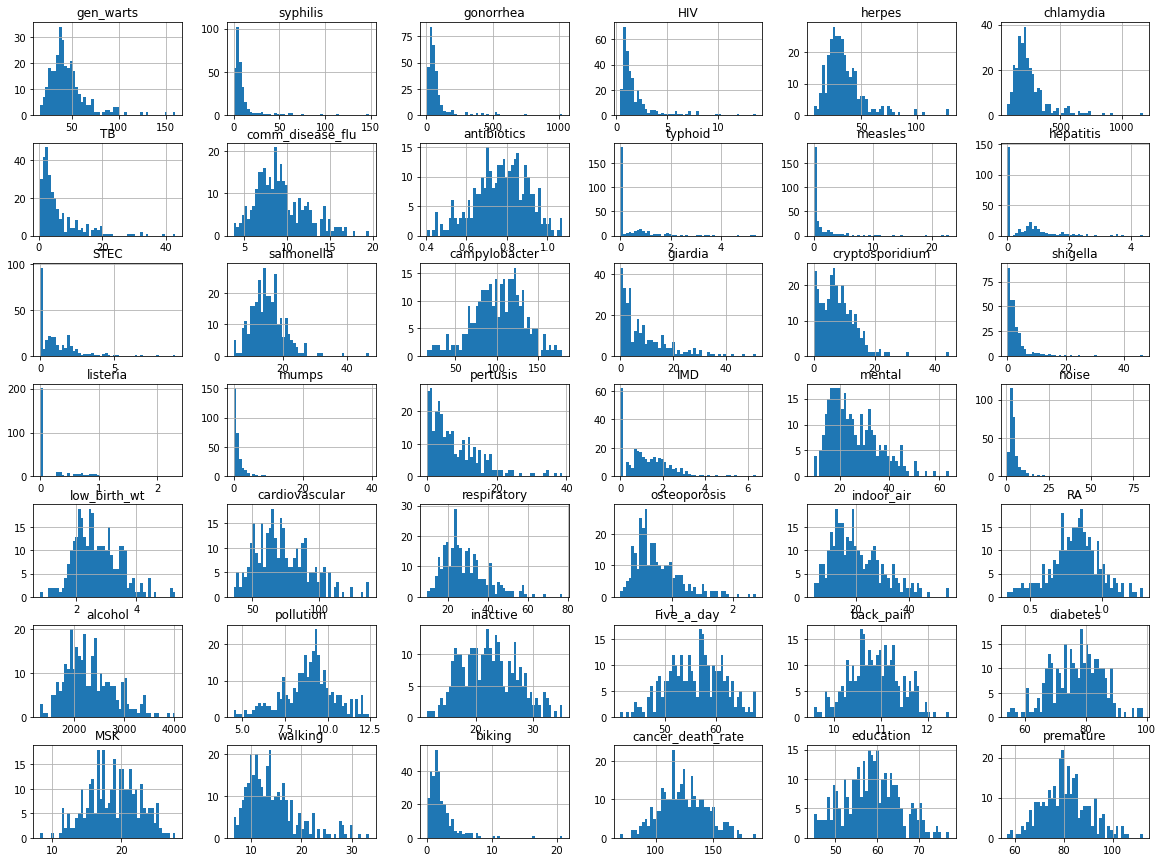

In [10]:
#Checking the distributions of each of the features reveals quite a few have long right tails, so
#would be good to explore boxcox transformations
#Due to the different scales of the data, a scaler should be used a well
dropCat(dataset).hist(bins=50, figsize=(20,15))
plt.show()

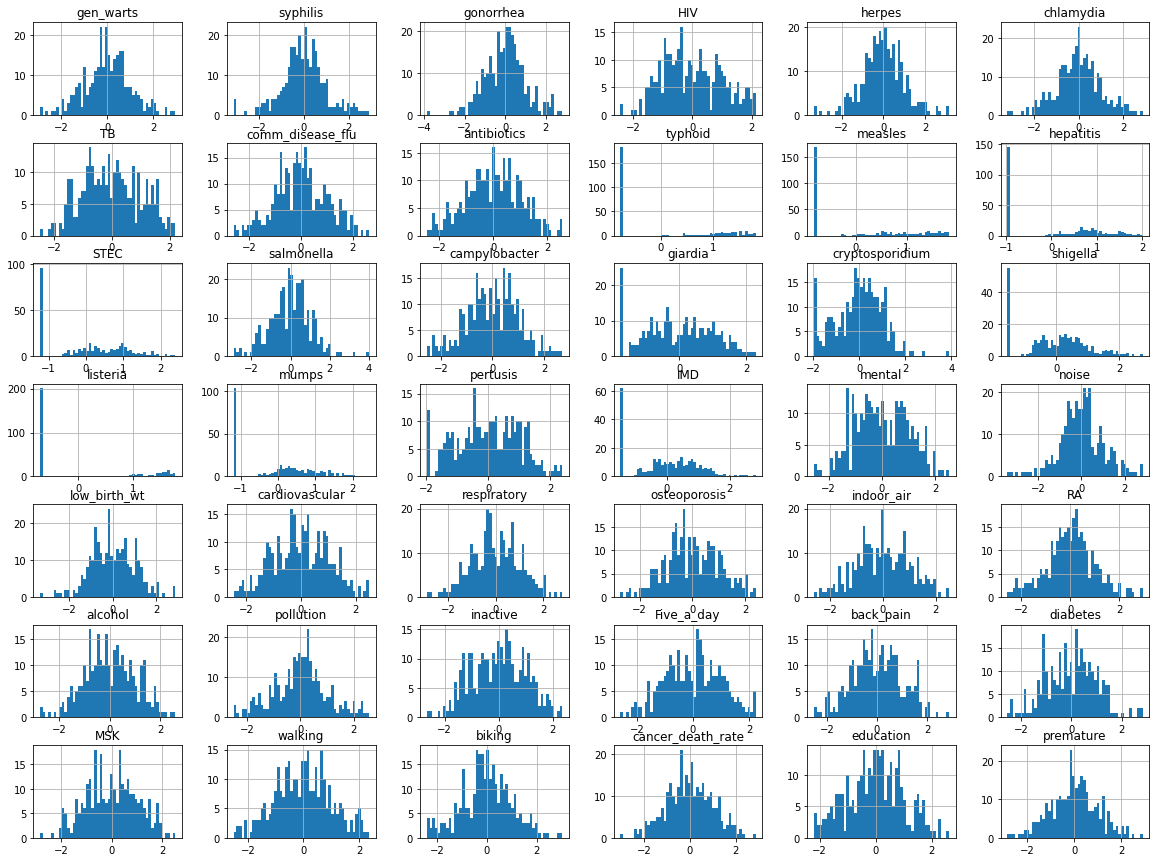

In [13]:
#Check what transformation and scaling does to the distributions.
pt = PowerTransformer()
pd.DataFrame(pt.fit_transform(dropCat(dataset)),columns=dropCat(dataset).columns).hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Several features have large numbers of records with zero values. Might be advantageous to remove these features
#from the set before modeling. These features are:
high_zero_count = ['typhoid','measles','hepatitis','STEC','giardia','shigella','listeria','mumps','IMD']

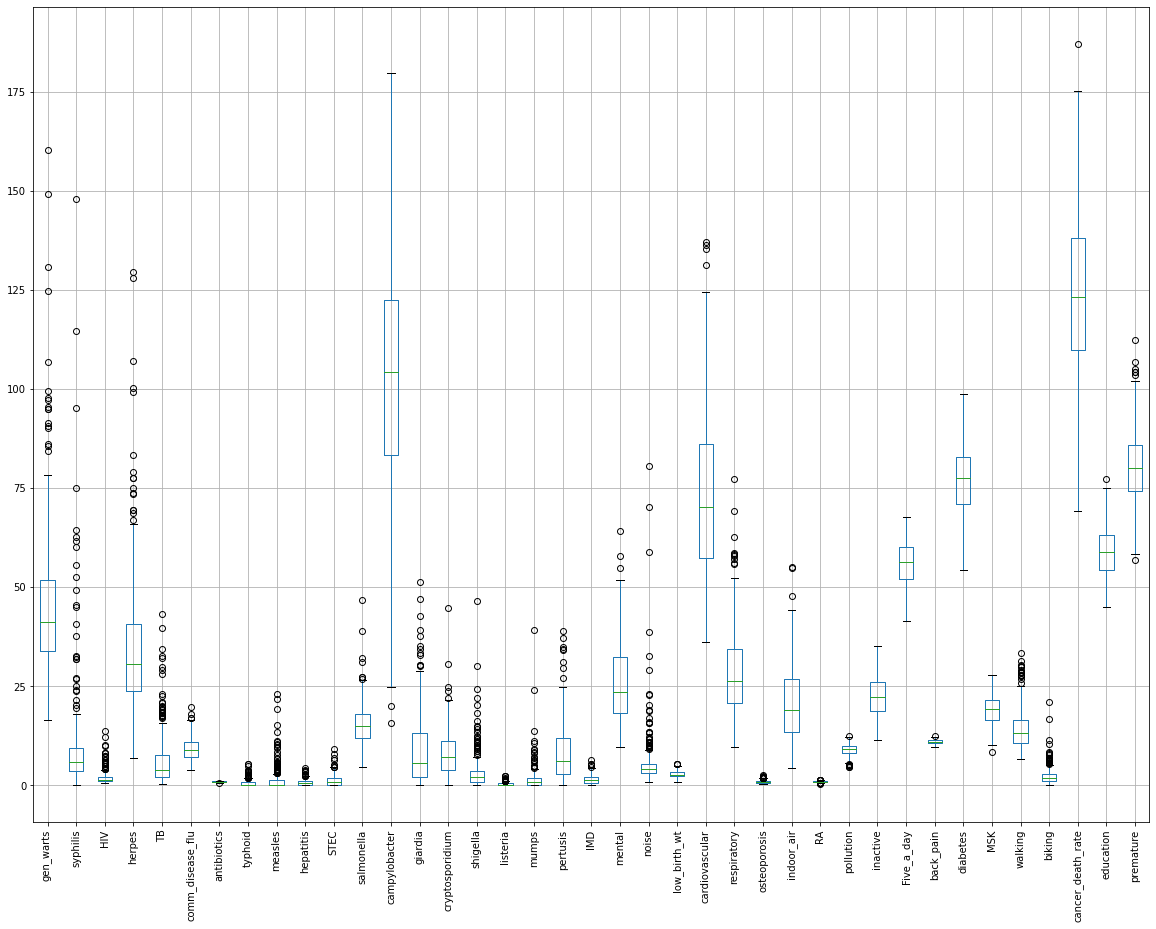

In [20]:
#Checking for influential outliers. Since some features have a different scale, plot those separately
dropCat(dataset).drop(['alcohol','chlamydia','gonorrhea'], axis=1).boxplot(figsize=(20,15))
plt.xticks(rotation='vertical')
plt.show()

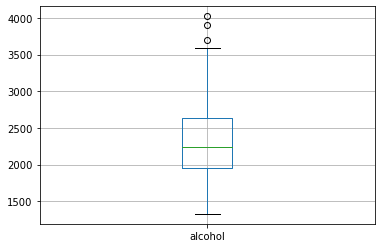

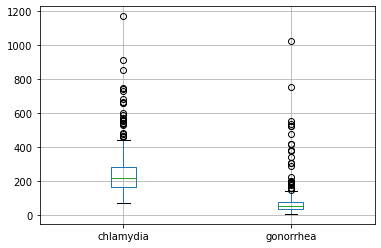

In [21]:
plt.figure()
dataset.boxplot(['alcohol'])
plt.show()
plt.figure()
dataset.boxplot(['chlamydia','gonorrhea'])
plt.show()

I don't see any obvious outliers of concern here; they all look to be legitimate. The max value for cancer death rate (corresponding to Manchester) was worth checking, but that data point appears reasonable, since Manchester is known to have the highest rates in the country: https://www.manchester.ac.uk/discover/news/cancer-deaths-higher-in-greater-manchester-compared-to-rest-of-uk/

In [23]:
dataset[dataset['cancer_death_rate']==dataset['cancer_death_rate'].max()]

,Area Code,Area Name,gen_warts,syphilis,gonorrhea,HIV,herpes,chlamydia,TB,comm_disease_flu,...,back_pain,diabetes,MSK,walking,biking,cancer_death_rate,education,premature,parent_area,parent_name
233,E08000003,Manchester,91.409485,32.56913,183.178848,6.168483,54.341862,408.463654,19.623497,12.215131,...,11.519474,77.167762,16.089102,20.3014,4.6304,187.131458,49.7893,82.7362,E12000002,North West
